# CDK2: Murcko Scaffolds

In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append('..')
sns.set(style='white', context='talk', font_scale=0.9)

In [9]:
from rdkit import Chem

### Load the data 

In [10]:
df_all_mols = pd.read_pickle('./df_COCRYS_CSAR_DUD_DEKOIS_with_Fingerprints_MDS.obj')

### Murcko Scaffolds
More information related to the Murcko Scaffold analysis is shown inside the FXa notebooks.


In [11]:
from scaffold_splitter import scaffold2smiles

In [12]:
# Function to compute 2d coords
to2d = Chem.rdDepictor.Compute2DCoords

### Compute Murcko Scaffolds

In [16]:
%%time
# Compute or load the dataframe containing the Generic Murcko Scaffolds
file = './df_COCRYS_CSAR_DUD_DEKOIS_Murcko_Scaffolds_SMILES.obj'

if os.path.isfile(file):
    df_murcko = pd.read_pickle(file)
else:
    df_murcko = df_all_mols[['library', 'name', 'mol_rdk']].copy()
    # Set index
    df_murcko = df_murcko.set_index(['library', 'name'])
    # Compute Generic Murko Scaffolds
    df_murcko['scff_generic'] = df_murcko.mol_rdk.apply(scaffold2smiles).values
    # Compute Murko Scaffolds
    df_murcko['scff'] = df_murcko.mol_rdk.apply(scaffold2smiles, generic=False).values
    # Save the file
    df_murcko.to_pickle(file)
    
# Add columns
df_murcko['Activity'] = df_all_mols['Activity'].apply(lambda x: 1 if x == 'active' else 0).values
df_murcko.shape

CPU times: user 238 ms, sys: 0 ns, total: 238 ms
Wall time: 235 ms


(3466, 4)

### Create a dataframe

#### Number of regular scaffolds

In [12]:
# Number of regular scaffolds
print('Number of unique regular scaffolds;', df_murcko.scff.unique().size)

Number of unique regular scaffolds; 2623


In [13]:
df_murcko['scff'].value_counts().head(10)

O=C(Nc1ccccc1)c1ccccc1                        30
O=C(NC1=CC=CC=C1)C1=CC=CC=C1                  29
                                              25
O=C(COc1ccccc1)Nc1ccccc1                      20
O=S(=O)(Nc1ccccc1)c1ccccc1                    18
c1ccc(Nc2nccc(-c3cncs3)n2)cc1                 15
O=C1N[C@H](c2ccccc2)c2c(-c3ccccc3)n[nH]c21    14
O=C(COC(=O)c1ccccc1)Nc1cccs1                  12
c1ccc(NCc2cccnc2)cc1                          11
O=C(c1ccccc1)c1cnc(Nc2ccccc2)s1               11
Name: scff, dtype: int64

#### Number of generic scaffolds

In [14]:
# Number of generic scaffolds
print('Number of unique generic scaffolds;', df_murcko.scff_generic.unique().size)

Number of unique generic scaffolds; 1162


In [15]:
df_murcko['scff_generic'].value_counts().head(10)

C1CCC(CCC2CCCCC2)CC1             130
C1CCC(CCCCC2CCCCC2)CC1           124
C1CCC(CCCCC2CCC3CCCCC3C2)CC1      67
C1CCC(CC2CCC(C3CCCCC3)C2)CC1      60
C1CCC(CCC2CCC(C3CCCCC3)C2)CC1     51
C1CCC(CCCC2CCCCC2)CC1             47
C1CCC(CCC2CCC3CCCC3C2)CC1         46
C1CCC(CCCCC2CCC3CCCC3C2)CC1       44
C1CCC(CCCCC2CC3CCCCC3C2)CC1       39
C1CCC(CC2CCC(CC3CCCCC3)C2)CC1     38
Name: scff_generic, dtype: int64

#### Length of generic scaffold SMILES

In [16]:
# Count the number of molecules inside each scaffold
scff_counts = df_murcko['scff_generic'].value_counts()
# get the length of the generic Scaffold
scff_smiles_len = scff_counts.index.map(len)
# Create a dataframe of unique scaffolds
df_scff_counts = pd.DataFrame({'counts': scff_counts, 'length': scff_smiles_len})
# Sort by length
df_scff_counts.sort_values('length', inplace = True)
df_scff_counts.head(8)

,counts,length
C1CCCC1,4,7
C1CCCCC1,15,8
C1CCCCCC1,1,9
C1CCCCCCCC1,1,11
C1CC2CCC1C2,1,11
C1CC2CCCC2C1,3,12
C1CCC2CCCC2C1,26,13
C1CCC2CCCCC2C1,18,14


In [17]:
# There are no molecules with len = 0

### Visualize Generic Scaffolds against Normal Scaffolds

In [18]:
# Function to get mol from scaffold smiles
fromSmiles = Chem.MolFromSmiles

In [19]:
# Helper function to visualize examples
def _draw_scaffolds(idx):
    labels = ['Original', 'Regular Scff.', 'Generic Scff.']
    to2d(df_all_mols.loc[idx, 'mol_rdk'])
    original = df_all_mols.loc[idx, 'mol_rdk']
    normal = fromSmiles(df_murcko['scff'].iloc[idx])
    generic = fromSmiles(df_murcko['scff_generic'].iloc[idx])
    mols = [original, normal, generic]
    return Chem.Draw.MolsToGridImage(mols=mols, legends=labels, subImgSize=(200, 200))

#### First Example

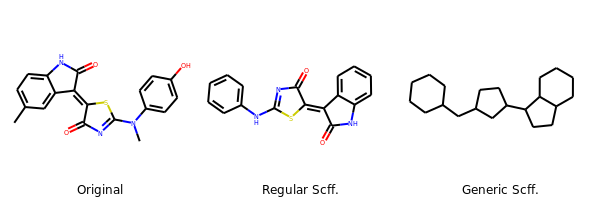

In [20]:
_draw_scaffolds(1759)

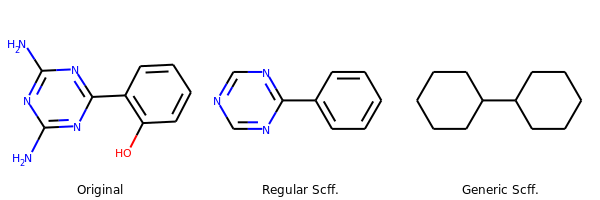

In [21]:
_draw_scaffolds(150)

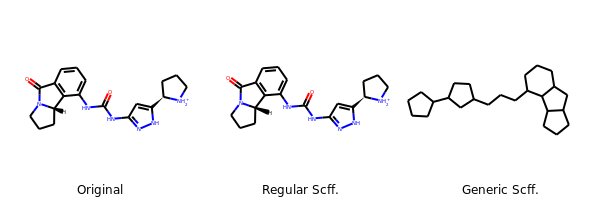

In [22]:
_draw_scaffolds(10)

### Draw most populated generic Scaffolds

In [27]:
most_freq_scff = df_murcko['scff_generic'].value_counts().head(28)
most_freq_scff

C1CCC(CCC2CCCCC2)CC1                130
C1CCC(CCCCC2CCCCC2)CC1              124
C1CCC(CCCCC2CCC3CCCCC3C2)CC1         67
C1CCC(CC2CCC(C3CCCCC3)C2)CC1         60
C1CCC(CCC2CCC(C3CCCCC3)C2)CC1        51
C1CCC(CCCC2CCCCC2)CC1                47
C1CCC(CCC2CCC3CCCC3C2)CC1            46
C1CCC(CCCCC2CCC3CCCC3C2)CC1          44
C1CCC(CCCCC2CC3CCCCC3C2)CC1          39
C1CCC(CC2CCC(CC3CCCCC3)C2)CC1        38
C1CCC(C2CCCC3CCCCC32)CC1             37
C1CCC(CCC2CCC3CCCCC3C2)CC1           35
C1CCC(CCCC2CCC3CCCCC3C2)CC1          34
C1CCC(CCCC2CC3CCCCC3C2)CC1           34
C1CCC(CCCCCC2CCCCC2)CC1              34
C1CCC(CC2CCCC(C3CCCC3)C2)CC1         32
C1CCC(CCCCCC2CCCC2)CC1               30
C1CCC(C2CCC3CCC(C4CCCCC4)C32)CC1     28
C1CCC(CCCCC2CCCC2)CC1                28
C1CCC(CCCCC2CCC(C3CCCCC3)C2)CC1      28
C1CCC(CCC2CCCC2)CC1                  27
C1CCC(CCC2CCCC3CCCC32)CC1            27
C1CCC(CCC2CC3CCCCC3C2)CC1            27
C1CCC(CCC2CCC3CCCCC32)CC1            26
C1CCC2CCCC2C1                        26


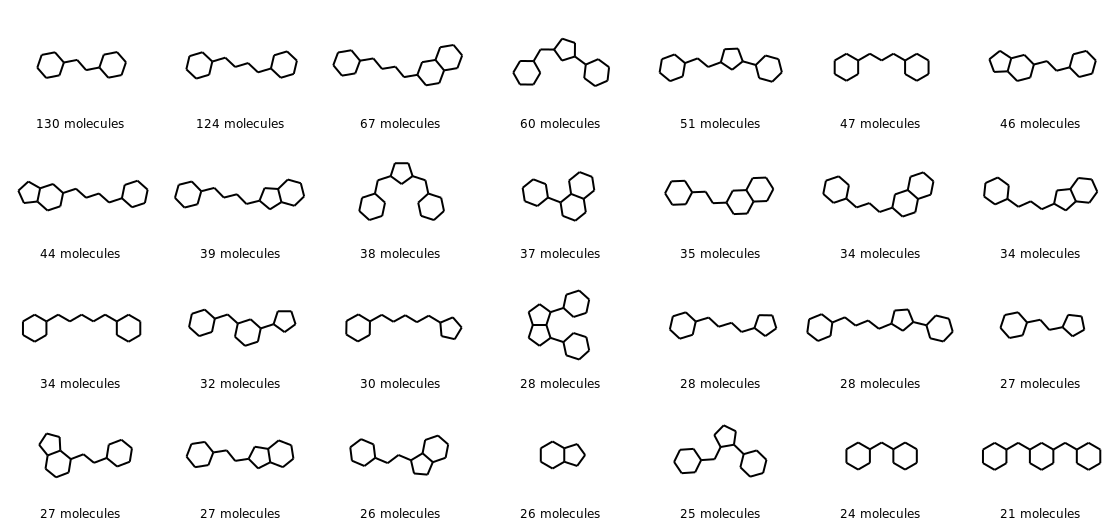

In [28]:
mols = [fromSmiles(mol) for mol in most_freq_scff.index.values]
num_mols_per_scff = [f'{n_mols} molecules' for n_mols in most_freq_scff]
Chem.Draw.MolsToGridImage(mols=mols, molsPerRow=7, legends=num_mols_per_scff, subImgSize=(160,130))

### Scaffold Distribution Among Molecular Libraries

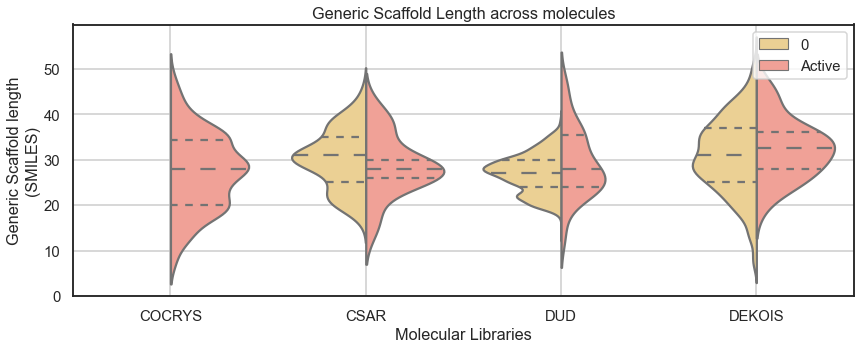

In [29]:
sns.set(context='talk', style='white', font_scale=0.9)

df_murcko['len_scff_gen'] = df_murcko.scff_generic.apply(len)
data = pd.melt(df_murcko.reset_index(), id_vars=['library', 'Activity'], 
               value_vars='len_scff_gen',
              value_name='len_scff_gen')

# Violin Plots
f, ax = plt.subplots(figsize=(14,5))
ax = sns.violinplot(x='library', y='len_scff_gen', hue='Activity', data=data, split=True,
                   palette=['#FAD585', '#FF9588'], inner='quartile', scale='area', ax = ax)
plt.grid()
plt.legend().get_texts()[1].set_text('Active')
ax.set(title='Generic Scaffold Length across molecules', xlabel='Molecular Libraries',
      ylabel='Generic Scaffold length\n(SMILES)')
plt.show()

In [31]:
print('Merged Libraries')
display(df_murcko.groupby('Activity').describe())

print('\nCOCRYS Library')
display(df_murcko.loc['COCRYS'].groupby('Activity').describe())

print('\nCSAR Library')
display(df_murcko.loc['CSAR'].groupby('Activity').describe())

print('\nDEKOIS Library')
display(df_murcko.loc['DEKOIS'].groupby('Activity').describe())

print('\nDUD Library')
display(df_murcko.loc['DUD'].groupby('Activity').describe())

Merged Libraries


len_scff_gen                                                  
                count       mean       std  min   25%   50%   75%   max
Activity                                                               
0              3051.0  28.612586  6.466866  7.0  24.0  28.0  32.0  53.0
1               415.0  28.149398  8.073745  8.0  23.0  28.0  35.0  48.0


COCRYS Library


len_scff_gen                                                   
                count       mean       std  min   25%   50%    75%   max
Activity                                                                
1               292.0  27.294521  8.289577  8.0  20.0  28.0  34.25  48.0


CSAR Library


len_scff_gen                                                   
                count       mean       std   min   25%   50%   75%   max
Activity                                                                
0                85.0  30.094118  6.353896  17.0  25.0  31.0  35.0  45.0
1                25.0  28.640000  6.651316  14.0  26.0  28.0  30.0  42.0


DEKOIS Library


len_scff_gen                                                   
                count       mean       std   min   25%   50%   75%   max
Activity                                                                
0              1199.0  30.830692  8.321414   7.0  25.0  31.0  37.0  53.0
1                40.0  32.450000  6.539623  19.0  28.0  32.5  36.0  47.0


DUD Library


len_scff_gen                                                   
                count       mean       std   min   25%   50%   75%   max
Activity                                                                
0              1767.0  27.036220  4.171282  14.0  24.0  27.0  30.0  39.0
1                58.0  29.275862  7.524913  13.0  24.0  28.0  35.5  47.0